In [1]:
from bfdc import drift, iotools
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/andrey/anaconda3/envs/pydrift/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/andrey/anaconda3/envs/pydrift/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
zt = iotools.open_csv_table('/Volumes/Imod-grenier/Andrey/data/2018/0820-tub-U2OS0813/FOV2/Stairs_200_ptsZ_200nm_20cycles_50ms_1/MMStack_Pos0.ome_locs_filter_zola_merged.csv')

In [3]:
dr = iotools.open_csv_table('/Volumes/Imod-grenier/Andrey/data/2018/0820-tub-U2OS0813/FOV2/Stairs_200_ptsZ_200nm_20cycles_50ms_1/BFCC_table.csv')

In [4]:
#invert drift z
dr_inv = dr.copy()

dr_inv[:,3] = -1 * dr[:,3]



In [5]:
zt_inv = zt.copy()
zt_inv[:,4] = zt_inv[:,4] * -1

In [6]:
zt_dc, dr_int = drift.apply_drift(zt_inv,dr,smooth=0,skip=0,start=0)

Frame number for zola/bf_DC : 94667/38342
Truncating ZOLA table to 38342 frames
New frame number: 38340


In [14]:
def plot_drift(dr):
    
    plt.style.use('dark_background')
    fig = plt.figure(dpi=300)
    plt.plot(dr[:,0],dr[:,1],label='x')
    plt.plot(dr[:,0],dr[:,2],label='y')
    plt.plot(dr[:,0],dr[:,3],label='z')
    plt.legend()
    #plt.grid()


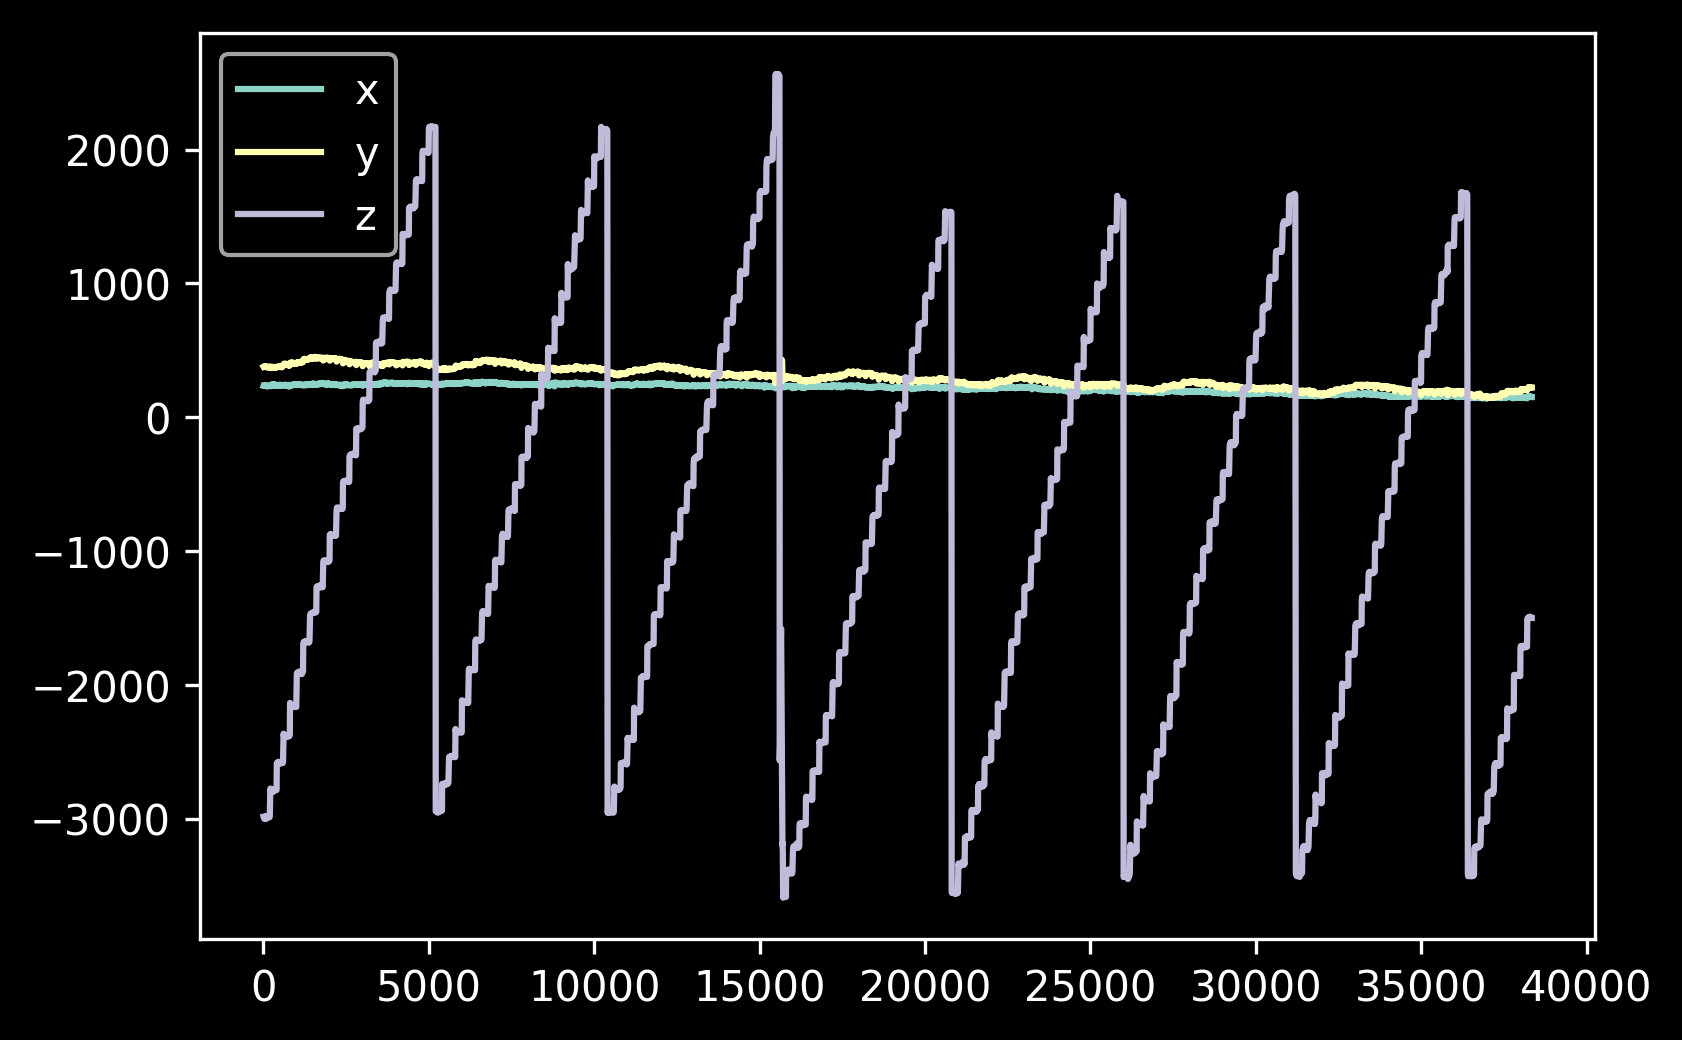

In [15]:
plot_drift(dr)

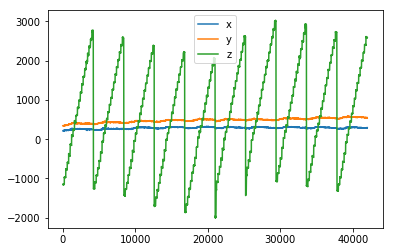

In [9]:
plot_drift(dr_inv)


In [7]:
iotools.save_zola_table(zt_dc,'/Volumes/Imod-grenier/Andrey/data/2018/0820-tub-U2OS0813/FOV2/Stairs_200_ptsZ_200nm_20cycles_50ms_1/zolaTableInv_bfdc.csv')

In [19]:
import inspect

In [23]:
print(inspect.getsource(iotools.save_zola_table))


def save_zola_table(table, path):
    header = 'id,frame,x [nm],y [nm],z [nm],intensity,background,chi2,crlbX,crlbY,crlbZ,driftX,driftY,driftZ,' \
             'occurrenceMerging '
    np.savetxt(path, table[:,:15], fmt='%.2f', delimiter=',', comments='', newline='\r\n', header=header)

